In [53]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import tree

In [54]:
data=pd.read_csv("play_tennis.csv")
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [55]:
data.play

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [57]:
d=np.array(data)[:,1:-1]
print(d)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]


In [59]:
targets=np.array(data)[:,-1]
print(targets)

['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


In [120]:
data['outlook'].replace(['Sunny', 'Overcast','Rain'],[0,1,2], inplace=True)
data['temp'].replace(['Hot', 'Mild','Cool'],[0,1,2], inplace=True)
data['humidity'].replace(['High', 'Normal'],[0,1], inplace=True)
data['wind'].replace(['Weak', 'Strong'],[0,1], inplace=True)
data['play'].replace(['No', 'Yes'],[0,1], inplace=True)
data

,day,outlook,temp,humidity,wind,play
0,D1,0,0,0,0,0
1,D2,0,0,0,1,0
2,D3,1,0,0,0,1
3,D4,2,1,0,0,1
4,D5,2,2,1,0,1
5,D6,2,2,1,1,0
6,D7,1,2,1,1,1
7,D8,0,1,0,0,0
8,D9,0,2,1,0,1
9,D10,2,1,1,0,1


In [75]:
d=np.array(data)[:,1:-1]
print(d)
d1=d.tolist()
print(d1)

[[0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [2 1 0 0]
 [2 2 1 0]
 [2 2 1 1]
 [1 2 1 1]
 [0 1 0 0]
 [0 2 1 0]
 [2 1 1 0]
 [0 1 1 1]
 [1 1 0 1]
 [1 0 1 0]
 [2 1 0 1]]
[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [2, 1, 0, 0], [2, 2, 1, 0], [2, 2, 1, 1], [1, 2, 1, 1], [0, 1, 0, 0], [0, 2, 1, 0], [2, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [2, 1, 0, 1]]


In [78]:
targets=np.array(data)[:,-1]
print(targets)
target=targets.tolist()
print(target)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d1,target,test_size=0.25,random_state=None)

In [117]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [118]:
clf.predict([[0.,0.,0.,1.]])

array([0])

[Text(148.8, 190.26, 'X[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(74.4, 135.9, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.20000000000002, 135.9, 'X[1] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 81.53999999999999, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

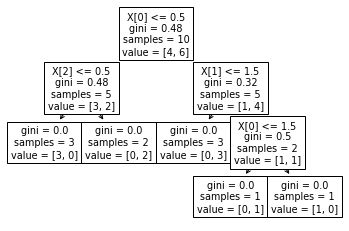

In [119]:
tree.plot_tree(clf)